In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

In [42]:
df = pd.read_csv('Position_Salaries.csv')
x = df.iloc[:,1:-1].values
y = df.iloc[:,-1].values

# reshape y to 2D array
y = y.reshape(len(y),1)

# Feature Scaling
# dalam SVR, perlu dilakukan feature scaling terhadap seluruh variabel (dependent & independent) karena skala masing-masing data haruslah sama
# feature scaling yang dilakukan adalah standardization
sc_x,sc_y = StandardScaler(), StandardScaler()
x = sc_x.fit_transform(x) 
y = sc_y.fit_transform(y) 

In [43]:
# Build SVR Model
from sklearn.svm import SVR
regressor = SVR(kernel='rbf')
regressor.fit(x,y)

# Predict new result
# karena data yang akan diprediksi berupa data baru, maka perlu dilakukan feature scaling terhadap data tersebut
# lalu, hasil prediksi yang didapatkan perlu di inverse transform agar kembali ke bentuk aslinya
print(sc_y.inverse_transform(regressor.predict(sc_x.transform([[6.5]])).reshape(1,-1)))

[[170370.0204065]]


c:\Users\Alif\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


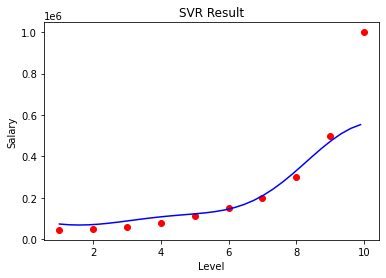

In [44]:
# Visualize SVR result
x_smooth = np.arange(min(x),max(x),0.1).reshape(-1,1)

# karena data yang akan divisualisasikan berupa data asli, maka perlu dilakukan inverse transform terhadap data tersebut
plt.scatter(sc_x.inverse_transform(x),sc_y.inverse_transform(y),color='red')
plt.plot(sc_x.inverse_transform(x_smooth),sc_y.inverse_transform(regressor.predict(x_smooth)),color='blue')
plt.title('SVR Result')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.show()